In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint
import os
import random
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from pykalman import KalmanFilter
from statistics import mean
from tqdm import tqdm


In [2]:
data=pd.read_csv("time_series_data_human_activities.csv")
data.head()

,user,activity,timestamp,x-axis,y-axis,z-axis
0,1,Walking,4991922345000,0.69,10.80,-2.03
1,1,Walking,4991972333000,6.85,7.44,-0.50
2,1,Walking,4992022351000,0.93,5.63,-0.50
3,1,Walking,4992072339000,-2.11,5.01,-0.69
4,1,Walking,4992122358000,-4.59,4.29,-1.95


In [3]:
#Splitting data
tmp=data.groupby('activity')['user'].unique()
l=[]
for i in tmp.keys():
    l.append(tmp[i])
from functools import reduce
comm=list(reduce(lambda i, j: i & j, (set(n) for n in l)))


In [4]:
def convert_float(x):
    a=x.real
    b=x.imag
    val=a+b 
    return val

416

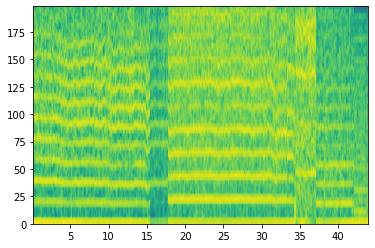

In [5]:
all=[]
for i in tmp.keys():
    for j in tmp[i]:
        X=data[(data['user']==j)&(data['activity']==i)]['x-axis']
        x_plt=(plt.specgram(X,Fs=400,NFFT=129)[0])#129:416 #
        #x_plt=np.fft.fft(X)
        #all.append(len(x_plt))
        all.append(x_plt.shape[1])
min_len=min(all)
min_len

In [6]:
import csv

def save_row(row, filename) :
    with open(filename, 'a+') as f :
        writer = csv.writer(f)
        writer.writerow(row)

/var/folders/h3/d0j621sd1z16w8586qpjgl_40000gn/T/ipykernel_21483/2261161829.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[i+str(j)]=cur
/var/folders/h3/d0j621sd1z16w8586qpjgl_40000gn/T/ipykernel_21483/2261161829.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[i+str(j)]=cur
/var/folders/h3/d0j621sd1z16w8586qpjgl_40000gn/T/ipykernel_21483/2261161829.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

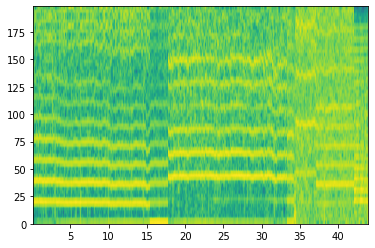

In [40]:
all=[]
label = []
df = pd.DataFrame()

for i in tmp.keys():
    for j in tmp[i]:
        xyz=[]
        X=data[(data['user']==j)&(data['activity']==i)]['x-axis']
        x_plt=(plt.specgram(X,Fs=400,NFFT=129)[0])[:,:min_len]
        Y=data[(data['user']==j)&(data['activity']==i)]['y-axis']
        y_plt=(plt.specgram(Y,Fs=400,NFFT=129)[0])[:,:min_len]
        Z=data[(data['user']==j)&(data['activity']==i)]['z-axis']
        z_plt=(plt.specgram(Z,Fs=400,NFFT=129)[0])[:,:min_len]
        xyz=np.concatenate((x_plt,y_plt,z_plt))

        #Kalman Filtering

        xyzt = xyz.T
        kf = KalmanFilter(n_dim_obs=xyzt.shape[1], n_dim_state = 5)
        kf = kf.em(xyzt, em_vars='all')
        cur = kf.smooth(xyzt)[0].flatten().tolist()
        cur.append(i)
        df[i+str(j)]=cur
        


In [41]:
df

,Downstairs1,Downstairs3,Downstairs4,Downstairs5,Downstairs6,Downstairs7,Downstairs8,Downstairs10,Downstairs11,Downstairs12,...,Walking27,Walking28,Walking29,Walking30,Walking31,Walking32,Walking33,Walking34,Walking35,Walking36
0,0.972506,3.563481,1.846812,0.181186,-1.040978,7.637147,4.852546,0.434466,3.966443,-1.016159,...,1.972852,-1.050936,3.364112,10.841701,-2.308701,-0.948693,-1.101064,-0.866411,2.893114,0.921536
1,-0.290794,2.330354,1.765337,-0.026966,0.409663,3.450869,3.492121,3.262676,2.579266,0.802916,...,1.291753,-1.325712,1.590531,6.509825,-0.650418,-0.160937,-0.44899,5.235342,-0.052766,-0.108324
2,-0.00544,-0.402085,-0.777771,-1.419871,-0.276077,-0.095165,3.514605,2.929204,-2.585111,-1.983369,...,-0.973797,6.408368,1.273737,0.040756,-1.122792,-0.984428,0.079561,1.629372,-1.273104,1.763394
3,2.260247,0.265981,-0.596055,-1.63732,-0.224747,-1.16368,-0.130135,-0.959032,0.999341,1.013547,...,0.137632,1.927871,-0.144953,-1.976776,1.3939,-3.065763,-0.230771,0.260616,-0.385249,-0.257456
4,-0.276783,-0.205736,-0.71736,3.768104,0.812106,1.344766,1.384306,0.013674,1.373285,-0.28444,...,-0.296529,2.045462,-0.693863,6.969144,1.433285,1.792333,0.052022,1.074532,0.201553,-0.579577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2076,9.901917,3.483156,4.106362,0.546058,0.499433,4.227532,1.682843,-0.511691,3.047124,1.408678,...,3.141407,1.727139,2.87557,10.331973,1.707452,3.42103,0.053307,-0.056823,2.794567,-0.966383
2077,-1.002297,-0.896697,0.525727,-0.852919,-0.598187,2.099368,1.947227,0.037345,-0.66481,-1.01339,...,2.91239,0.142192,-0.581709,-0.761316,0.461856,0.25726,-0.384413,0.098092,0.256172,0.681737
2078,0.899072,-0.242898,-0.042781,1.980991,-0.841591,0.35961,-0.282747,1.508281,0.479318,1.388302,...,1.428764,0.888397,-0.956412,-0.509162,0.892239,0.23499,-0.549144,3.483575,-0.195019,1.989214
2079,0.291203,-0.239146,0.01138,-1.533519,-1.15845,-0.862746,0.388608,1.329866,-0.914396,0.721925,...,4.196026,-0.019873,0.308724,-0.408499,-0.750324,-0.365355,0.038498,0.133893,0.073532,2.34294


In [42]:
label=df.to_numpy()[-1]
dp=df.to_numpy()[:-1]

In [91]:
dp.shape

(2080, 179)

In [36]:
#kf.smooth(xyzt)[0]
#kf.loglikelihood(xyzt)

# 1: 656199.4835051356
# 2: 657251.5133270752
# 3: 495382.69096738694
# 4: 489569.7418548055
# 5: 490399.0628439033
# 6: 491240.2465254724
# 7: 492131.06526924204
# 8: 492948.75142410496
# 9: 493793.53757253947
# 20: 503802.30936532316
# 30: 511300.0140466521

(416, 5)

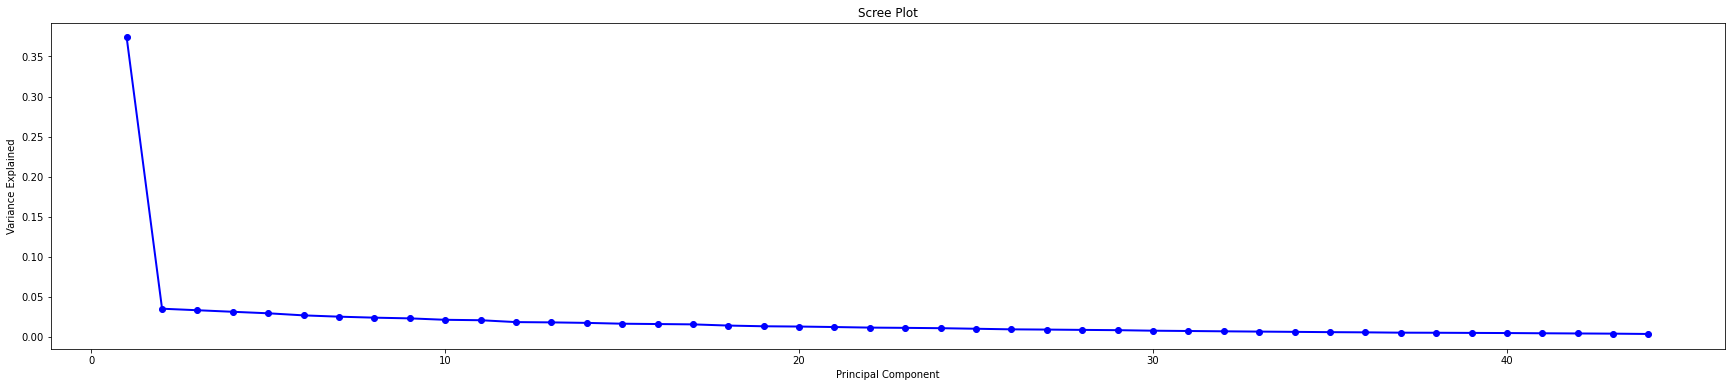

In [104]:
scaler = MinMaxScaler()
data_pca=dp.T
data_rescaled = scaler.fit_transform(data_pca)
pca = PCA(n_components=0.95).fit(data_rescaled)

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

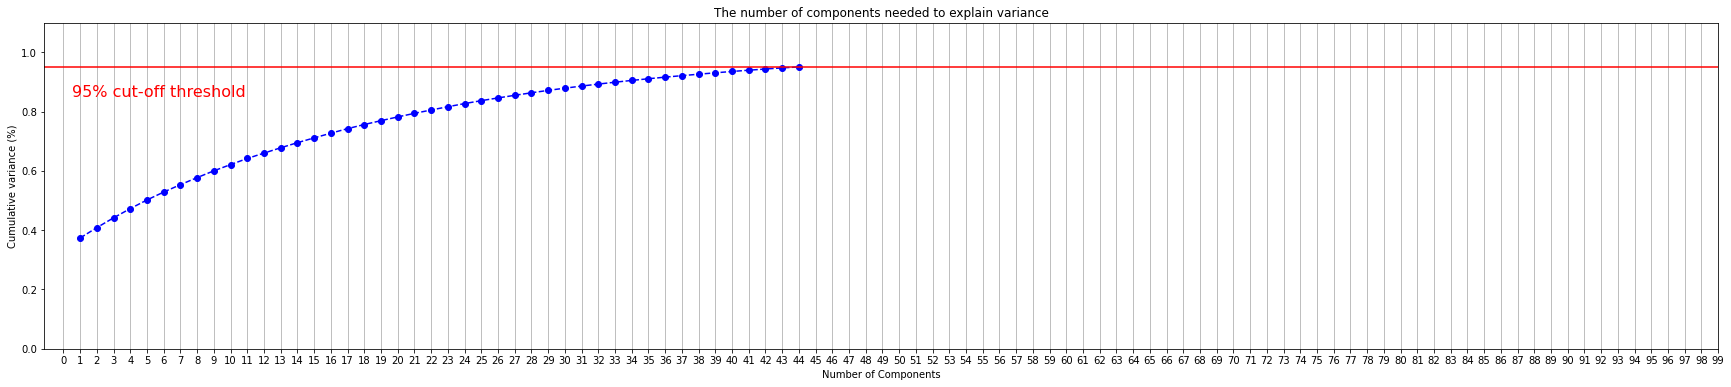

In [105]:
# % matplotlib inline
plt.rcParams["figure.figsize"] = (30,6)

fig, ax = plt.subplots()
xi = np.arange(pca.n_components_) + 1
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 100, step=1)) 
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [94]:
dp_pca=pca.fit_transform(data_rescaled)

In [95]:
dp_pca.shape

(179, 44)

In [96]:
x_train,x_test,y_train,y_test=train_test_split(dp_pca,label,test_size=0.3)

In [97]:
x_train.shape

(125, 44)

In [98]:
x_test.shape

(54, 44)

In [99]:
clf = svm.SVC(kernel='rbf') 
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [100]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.2962962962962963


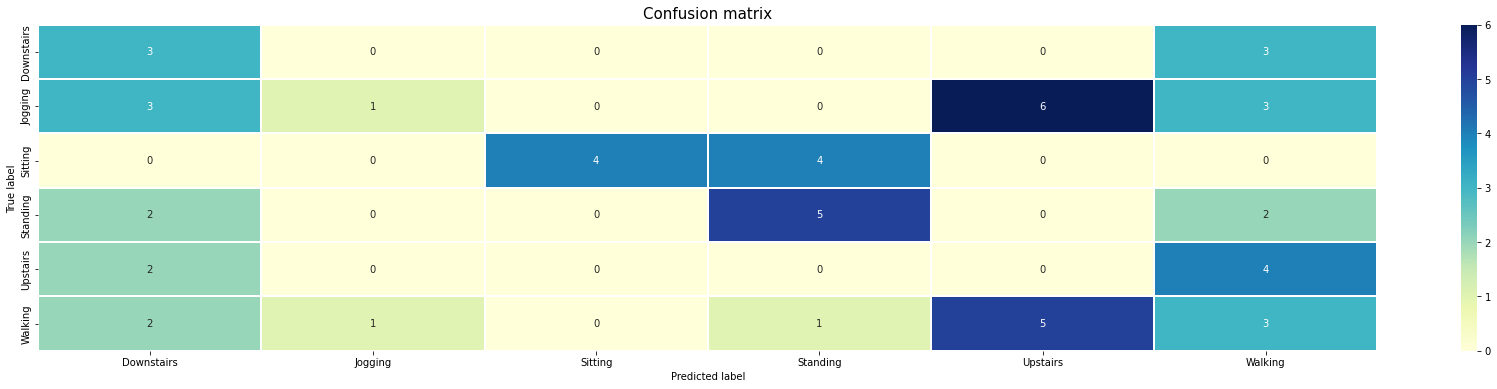

In [73]:
from sklearn.metrics import confusion_matrix
labels = ["Downstairs", "Jogging", "Sitting", "Standing", "Upstairs", "Walking"]
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, xticklabels=labels, yticklabels=labels, annot=True,linewidths = 0.1, fmt="d", cmap = "YlGnBu")
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()